In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('E:/Complete_Dataset/Phising_Training_Dataset.csv')
test = pd.read_csv('E:/Complete_Dataset/Phising_Testing_Dataset.csv')
data.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [36]:
target = data.iloc[:,-1]
train = data.iloc[:,1:-1]
key = test[['key']]
test = test.iloc[:,1:]

In [37]:
from sklearn.metrics import classification_report
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# from sklearn.model_selection import RandomizedSearchCV
# distributions = dict(n_estimators=[1000,5000,10000], learning_rate= [0.3,0.1,0.05], max_features=['auto',30])
# gbc = GradientBoostingClassifier(random_state=0)
# clf = RandomizedSearchCV(gbc, distributions, random_state=0, n_jobs = -1, cv = 5, verbose = 2)
# search = clf.fit(train, target)
# print(search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 10000, 'max_features': 'auto', 'learning_rate': 0.05}

In [39]:
from sklearn.model_selection import train_test_split
X_tr, X_tt, y_tr, y_tt = train_test_split(train, target, stratify=target, test_size=0.2, random_state=0)
print(X_tr.shape, X_tt.shape, y_tr.shape, y_tt.shape)

(7164, 30) (1791, 30) (7164,) (1791,)


In [40]:
model = GradientBoostingClassifier(n_estimators = 10000, max_features =  'auto', learning_rate = 0.05, verbose = 1, random_state=0)
hist = model.fit(X_tr, y_tr)

      Iter       Train Loss   Remaining Time 
         1           1.3001            1.15m
         2           1.2363            1.11m
         3           1.1785            1.20m
         4           1.1259            1.13m
         5           1.0778            1.11m
         6           1.0339            1.11m
         7           0.9933            1.07m
         8           0.9562            1.09m
         9           0.9218            1.07m
        10           0.8901            1.06m
        20           0.6735            1.03m
        30           0.5575            1.02m
        40           0.4879            1.04m
        50           0.4388            1.02m
        60           0.4034            1.00m
        70           0.3775            1.02m
        80           0.3591            1.04m
        90           0.3439            1.02m
       100           0.3300            1.02m
       200           0.2554           59.51s
       300           0.2220           59.26s
       40

In [41]:
y_pred_all = model.predict(X_tt)
print(classification_report(y_tt, y_pred_all))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       784
           1       0.97      0.97      0.97      1007

    accuracy                           0.97      1791
   macro avg       0.97      0.97      0.97      1791
weighted avg       0.97      0.97      0.97      1791



We can see accuracy on validation set is 97% using all features

In [42]:
importance = model.feature_importances_

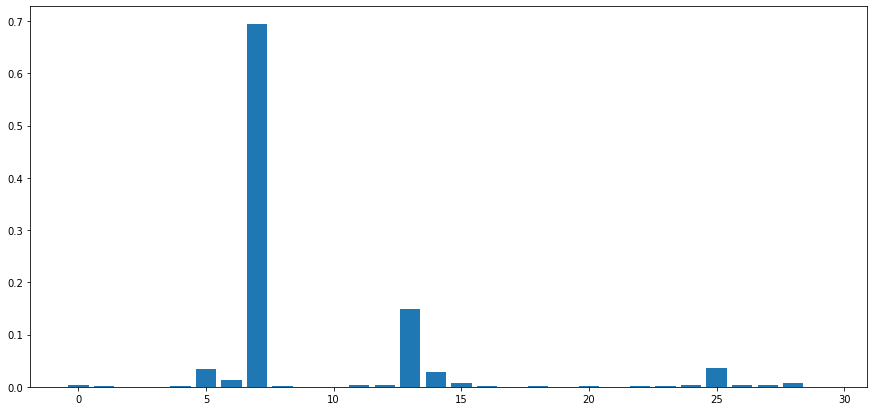

In [43]:
dominant_features = []
for i,v in enumerate(importance):
	# print('Feature: %0d, Score: %.5f' % (i,v))
	dominant_features.append([i,v])
# plot feature importance
plt.figure(figsize=(15,7))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [44]:
array = np.array(dominant_features).astype('float')
dominant = pd.DataFrame()
dominant['Feature'] = array[:,0]
dominant['importance'] = array[:,1]
dominant.sort_values(by=['importance'], ascending=False, inplace=True)
print(dominant.iloc[:10,:])
print(train.columns[7], train.columns[13])

    Feature  importance
7       7.0    0.693571
13     13.0    0.149179
25     25.0    0.035329
5       5.0    0.034587
14     14.0    0.028635
6       6.0    0.013602
28     28.0    0.007362
15     15.0    0.006676
12     12.0    0.003489
24     24.0    0.003157
SSLfinal_State URL_of_Anchor


We can clearly see that top 2 dominant features from top 10 dominant features listed above, are 7th and 13th which are SSLfinal_State and URL_of_Anchor. Now, I will remove these features and select my hypermeters using Cross Validation and then train on it.

In [45]:
train.drop(columns=['SSLfinal_State','URL_of_Anchor'], inplace = True)
test.drop(columns=['SSLfinal_State','URL_of_Anchor'], inplace = True)

C:\Users\bishn\AppData\Local\Temp\ipykernel_97956\1540237659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['SSLfinal_State','URL_of_Anchor'], inplace = True)


In [47]:
# from sklearn.model_selection import RandomizedSearchCV
# distributions = dict(n_estimators=[1000,5000,10000], learning_rate= [0.3,0.1,0.05], max_features=['auto',28])
# gbc = GradientBoostingClassifier(random_state=0)
# clf = RandomizedSearchCV(gbc, distributions, random_state=0, n_jobs = -1, cv = 5, verbose = 2)

In [48]:
# search = clf.fit(train, target)
# print(search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 5000, 'max_features': 'auto', 'learning_rate': 0.3}

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, stratify=target, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7164, 28) (1791, 28) (7164,) (1791,)


In [50]:
model2 = GradientBoostingClassifier(n_estimators = 5000, max_features =  'auto', learning_rate = 0.3, verbose = 1, random_state=0)
history = model2.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1788           42.06s
         2           1.0699           35.19s
         3           1.0020           39.37s
         4           0.9537           35.98s
         5           0.9132           35.68s
         6           0.8893           34.81s
         7           0.8566           33.65s
         8           0.8396           34.25s
         9           0.8220           34.06s
        10           0.8039           33.83s
        20           0.7057           30.77s
        30           0.6480           29.76s
        40           0.6122           31.46s
        50           0.5917           31.14s
        60           0.5721           31.10s
        70           0.5558           31.19s
        80           0.5428           30.68s
        90           0.5281           30.29s
       100           0.5141           30.06s
       200           0.4344           28.30s
       300           0.3917           27.37s
       40

In [51]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.91      0.88      0.90       784
           1       0.91      0.93      0.92      1007

    accuracy                           0.91      1791
   macro avg       0.91      0.91      0.91      1791
weighted avg       0.91      0.91      0.91      1791



Here, we can see there is a decrease in accuracy (91%) when 2 top dominant features have been removed.

In [54]:
# Training on whole dataset
model_final = GradientBoostingClassifier(n_estimators = 6000, max_features =  'auto', learning_rate = 0.3, verbose = 1, random_state=0)
model_final.fit(train, target)

      Iter       Train Loss   Remaining Time 
         1           1.1725            1.94m
         2           1.0599            1.74m
         3           0.9895            1.93m
         4           0.9396            1.87m
         5           0.9043            1.83m
         6           0.8771            1.81m
         7           0.8587            1.84m
         8           0.8407            1.81m
         9           0.8229            1.80m
        10           0.8088            1.78m
        20           0.6898            1.68m
        30           0.6422            1.62m
        40           0.5996            1.51m
        50           0.5782            1.43m
        60           0.5603            1.43m
        70           0.5453            1.43m
        80           0.5311            1.45m
        90           0.5193            1.45m
       100           0.5110            1.41m
       200           0.4375            1.08m
       300           0.3978           56.11s
       40

GradientBoostingClassifier(learning_rate=0.3, max_features='auto',
                           n_estimators=6000, random_state=0, verbose=1)

In [55]:
yhat = model_final.predict(test)

In [56]:
df = pd.DataFrame()
df['key'] = key
df['Result'] = yhat
df

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,-1


In [57]:
df.to_csv('submission.csv', index=False)

### As we can see that, there was a significant decrease of accuracy after removing 2 top dominant features, so they have a pivotal role in correctly identifying if the website is legitimate or not.